In [1]:
# Usual Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

# Librosa (the mother of audio files)
import librosa
import librosa.display
import IPython.display as ipd
import warnings
warnings.filterwarnings('ignore')

import matplotlib
matplotlib.rcParams['figure.figsize'] = 15, 5


In [2]:
y, sr = librosa.load('./Data/genres_original/reggae/reggae.00036.wav')

# Trim leading and trailing silence from an audio signal (silence before and after the actual audio)
audio_file, _ = librosa.effects.trim(y)
audio_file.shape, sr

((661794,), 22050)

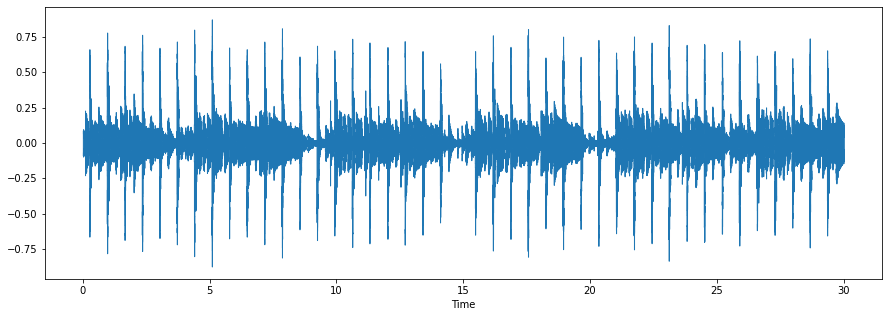

In [3]:
librosa.display.waveshow(audio_file, sr=sr)

#### Fourier transform analysis

In [27]:
n_fft = 1024 # FFT window size
hop_length = 512
D = np.abs(librosa.stft(audio_file, n_fft = n_fft, hop_length = hop_length))

print('Shape of D object:', np.shape(D))

Shape of D object: (513, 1293)


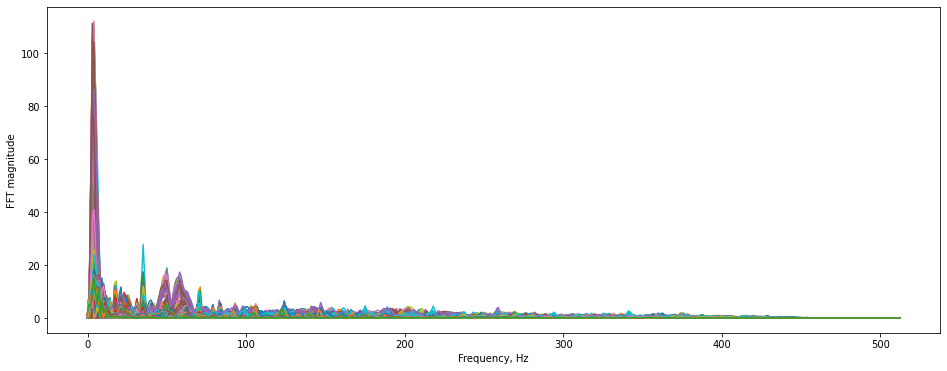

In [28]:
plt.figure(figsize = (16, 6))
plt.plot(D)
plt.xlabel("Frequency, Hz")
plt.ylabel("FFT magnitude");

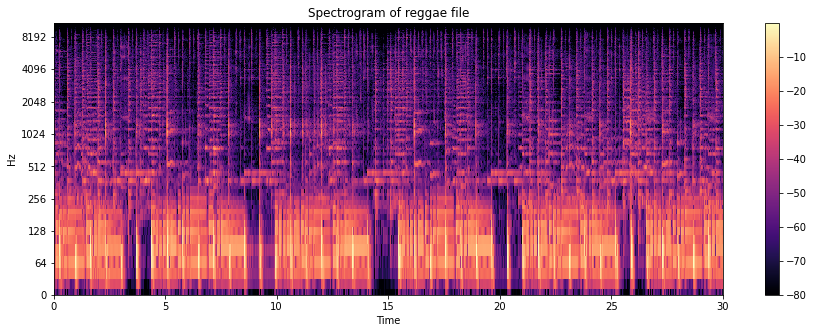

In [29]:

# Convert an amplitude spectrogram to Decibels-scaled spectrogram.
DB = librosa.amplitude_to_db(D, ref = np.max)

# Creating the Spectogram
librosa.display.specshow(DB, sr = sr, hop_length = hop_length, x_axis = 'time', y_axis = 'log')
plt.title("Spectrogram of reggae file")
plt.colorbar();

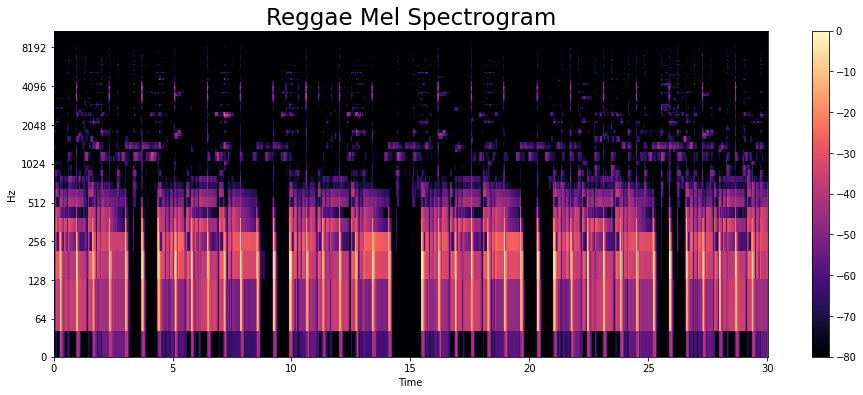

In [30]:
S = librosa.feature.melspectrogram(audio_file, sr=sr)
S_DB = librosa.amplitude_to_db(S, ref=np.max)
plt.figure(figsize = (16, 6))
librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, x_axis = 'time', y_axis = 'log')
plt.colorbar()
plt.title("Reggae Mel Spectrogram", fontsize = 23);

In [8]:
# TODO compare Mel spectrograms of different genres on one plot

In [9]:
genres = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']

In [10]:
# for genre in genres:
#    y, sr = librosa.load(f'./Data/genres_original/{genre}/{genre}.00036.wav')

#    S = librosa.feature.melspectrogram(y, sr=sr)
#    S_DB = librosa.amplitude_to_db(S, ref=np.max)
#    plt.figure(figsize = (16, 6))
#    librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, x_axis = 'time', y_axis = 'log')
#    plt.colorbar()
#    plt.title(f"{genre} Mel Spectrogram", fontsize = 23);
#    plt.savefig(f"genre_spectrograms/{genre}_mel_spectrogram.png")

### Extracting Audio Features

In [33]:
# Total zero_crossings in our 1 song
zero_crossings = librosa.zero_crossings(audio_file, pad=False)
print(sum(zero_crossings))

39232


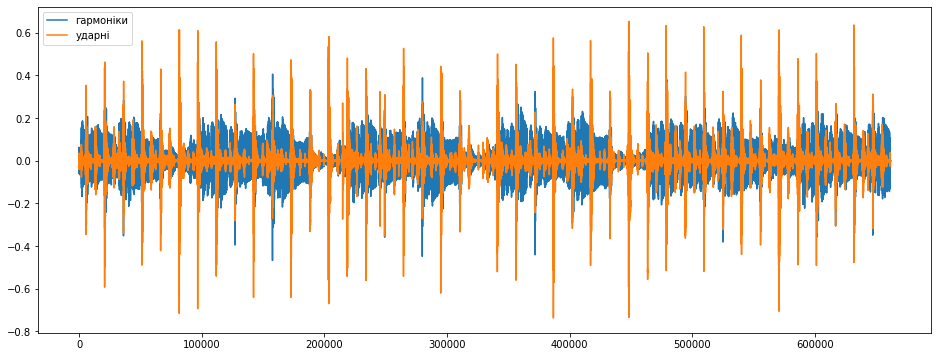

In [32]:
y_harm, y_perc = librosa.effects.hpss(audio_file)

plt.figure(figsize = (16, 6))
plt.plot(y_harm, label="гармоніки")
plt.plot(y_perc, label="ударні")
plt.legend();


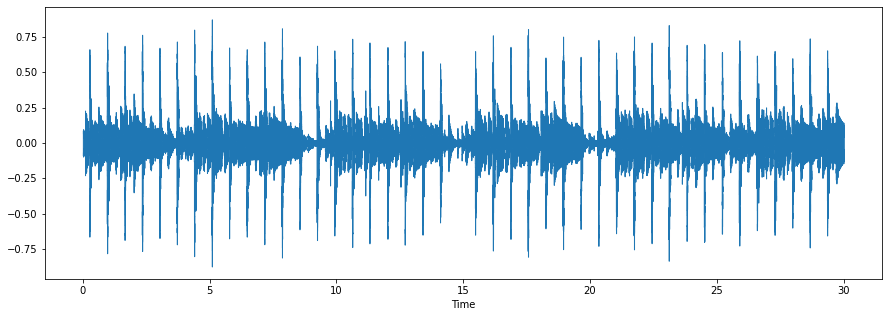

In [12]:
librosa.display.waveshow(audio_file, sr=sr)

In [13]:
# BPM
tempo, _ = librosa.beat.beat_track(y, sr = sr)
tempo

86.1328125

#### Spectral Centroid

In [14]:
# Calculate the Spectral Centroids
spectral_centroids = librosa.feature.spectral_centroid(audio_file, sr=sr)[0]

# Shape is a vector
print('Centroids:', spectral_centroids, '\n')
print('Shape of Spectral Centroids:', spectral_centroids.shape, '\n')

# Computing the time variable for visualization
frames = range(len(spectral_centroids))

# Converts frame counts to time (seconds)
t = librosa.frames_to_time(frames)

print('frames:', frames, '\n')
print('t:', t)

# Function that normalizes the Sound Data
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

Centroids: [1817.93364736 1953.08392985 2038.8113414  ...  766.50416352 1019.33192639
 1081.69931747] 

Shape of Spectral Centroids: (1293,) 

frames: range(0, 1293) 

t: [0.00000000e+00 2.32199546e-02 4.64399093e-02 ... 2.99537415e+01
 2.99769615e+01 3.00001814e+01]


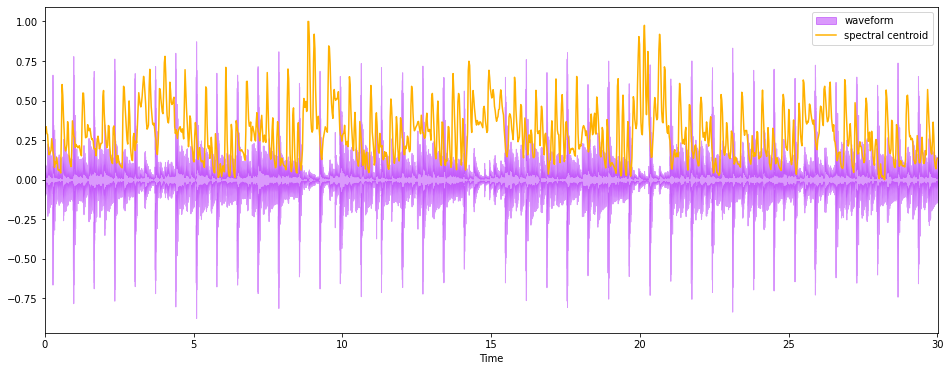

In [35]:
#Plotting the Spectral Centroid along the waveform
plt.figure(figsize = (16, 6))
librosa.display.waveplot(audio_file, sr=sr, alpha=0.4, color = '#A300F9', label="waveform")
plt.plot(t, normalize(spectral_centroids), color='#FFB100', label="spectral centroid")
plt.legend();

##### Spectral Rolloff

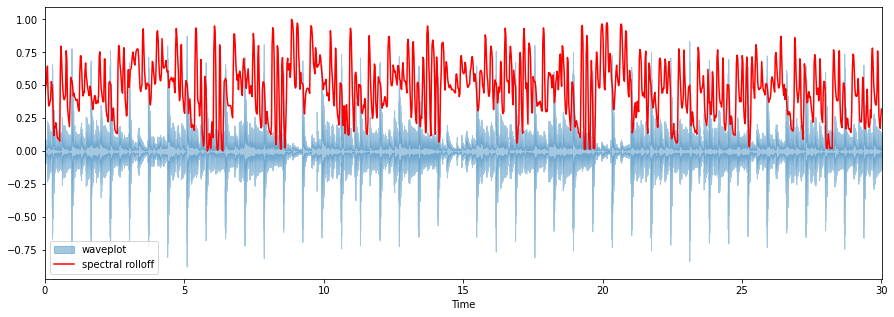

In [39]:
spectral_rolloff = librosa.feature.spectral_rolloff(audio_file+0.01, sr=sr)[0]
librosa.display.waveplot(audio_file, sr=sr, alpha=0.4, label="waveplot")
plt.plot(t, normalize(spectral_rolloff), color='r', label="spectral rolloff") # normalize for visualization purposes
plt.legend();

#### Mel-Frequency Cepstral Coefficients

mfccs shape: (20, 1293)


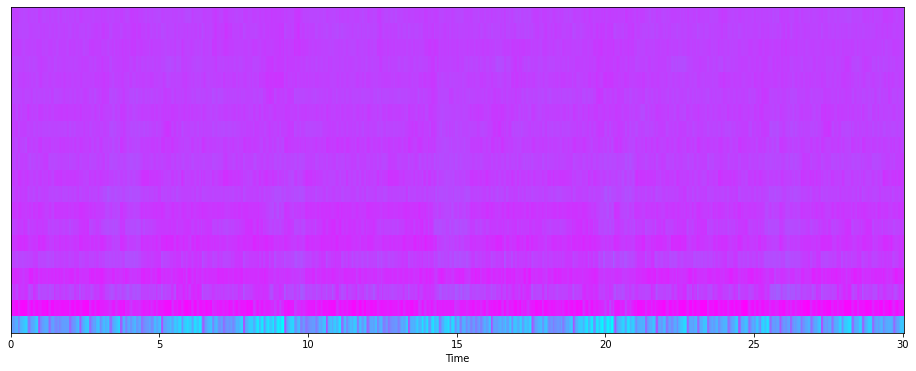

In [18]:
mfccs = librosa.feature.mfcc(audio_file, sr=sr)
print('mfccs shape:', mfccs.shape)

#Displaying  the MFCCs:
plt.figure(figsize = (16, 6))
librosa.display.specshow(mfccs, sr=sr, x_axis='time', cmap = 'cool');

Mean: 1.9176745e-09 

Var: 1.0000001


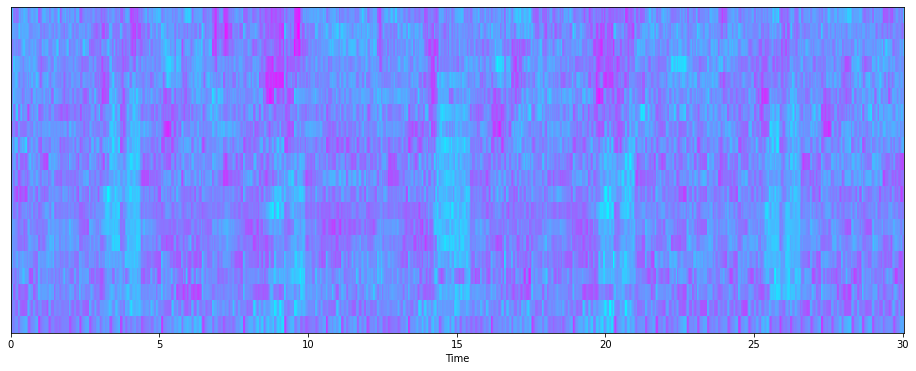

In [19]:
# Perform Feature Scaling
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
print('Mean:', mfccs.mean(), '\n')
print('Var:', mfccs.var())

plt.figure(figsize = (16, 6))
librosa.display.specshow(mfccs, sr=sr, x_axis='time', cmap = 'cool');

#### Chroma Frequencies

Chromogram shape: (12, 133)


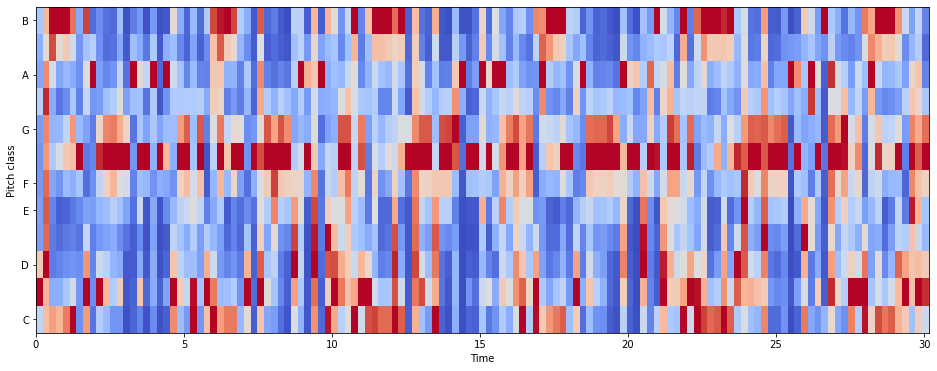

In [21]:
# Increase or decrease hop_length to change how granular you want your data to be
hop_length = 5000

# Chromogram
chromagram = librosa.feature.chroma_stft(audio_file, sr=sr, hop_length=hop_length)
print('Chromogram shape:', chromagram.shape)

plt.figure(figsize=(16, 6))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm');

Index(['filename', 'length', 'chroma_stft_mean', 'chroma_stft_var', 'rms_mean',
       'rms_var', 'spectral_centroid_mean', 'spectral_centroid_var',
       'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rolloff_mean',
       'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var',
       'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'tempo',
       'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean',
       'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var',
       'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean',
       'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var',
       'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean',
       'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var',
       'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean',
       'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var',
  

NameError: name 'data' is not defined